<a href="https://colab.research.google.com/github/DavorJordacevic/NEURAL-NETWORKS-/blob/master/Shallow_neural_network_with_Keras_circles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow_neural_network_with_Keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
# generate two datasets
X,y = make_circles(n_samples = 3000, noise = 0.08, factor=0.3)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(3000, 2)
(3000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
X0 = [X[i,:] for i in range(len(y)) if y[i] == 0] # returns the row where the corresponding label is 0
X1 = [X[i,:] for i in range(len(y)) if y[i] == 1] # returns the row where the corresponding label is 1

            
X0_np = np.array(X0) # convert it into an array
X1_np = np.array(X1) 

X0_train = X0_np[:1000,:].T # picked the first 1000 samples in the second axis
X0_test = X0_np[1000:,:].T # picked the remaining 500 samples in the second axis

X1_train = X1_np[:1000,:].T  # picked the first 1000 samples in the second axis
X1_test = X1_np[1000:,:].T # picked the remaining 500 samples in the second axis

X_train = np.hstack([X0_train,X1_train]).T # all training examples
y_train=np.zeros((1,2000))
y_train[0, 1000:] = 1

X_test = np.hstack([X0_test,X1_test]).T # all test examples
y_test=np.zeros((1,1000))
y_test[0, 500:] = 1

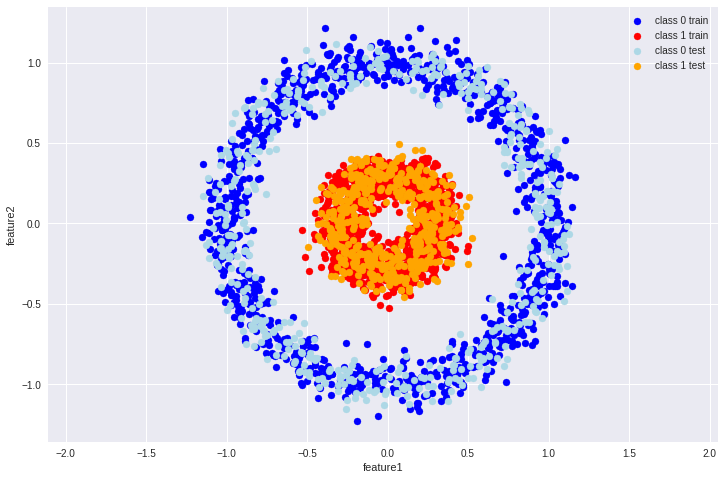

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(X0_train[0,:],X0_train[1,:], color = 'b', label = 'class 0 train')
plt.scatter(X1_train[0,:],X1_train[1,:], color = 'r',  label = 'class 1 train')
plt.scatter(X0_test[0,:],X0_test[1,:], color = 'LightBlue', label = 'class 0 test')
plt.scatter(X1_test[0,:],X1_test[1,:], color = 'Orange', label = 'class 1 test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

In [0]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(2000, 2)
y_train:	(1, 2000)
x_test:		(1000, 2)
y_test:		(1, 1000)


In [0]:
# Hyper-parameters
training_epochs = 400 # Total number of training epochs
learning_rate = 0.03 # The learning rate

In [0]:
# create model
def create_model():
  model = Sequential()
  # Input layer
  model.add(Dense(6, input_dim=2, kernel_initializer='normal', activation='relu'))
  # Output layer
  model.add(Dense(y_train.T.shape[1], activation='sigmoid'))
 
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=adam(learning_rate), metrics=['accuracy'])
  return model
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [0]:
results = model.fit(
 X_train, y_train.T,
 epochs= training_epochs,
 batch_size = 516,
 validation_data = (X_test, y_test.T)
)

Train on 2000 samples, validate on 1000 samples
Epoch 1/400
2000/2000 [==============================] - 1s 277us/step - loss: 0.6878 - acc: 0.4885 - val_loss: 0.6751 - val_acc: 0.5000
Epoch 2/400
2000/2000 [==============================] - 0s 7us/step - loss: 0.6720 - acc: 0.5935 - val_loss: 0.6572 - val_acc: 0.6420
Epoch 3/400
2000/2000 [==============================] - 0s 6us/step - loss: 0.6546 - acc: 0.6175 - val_loss: 0.6354 - val_acc: 0.6840
Epoch 4/400
2000/2000 [==============================] - 0s 7us/step - loss: 0.6336 - acc: 0.7095 - val_loss: 0.6108 - val_acc: 0.7810
Epoch 5/400
2000/2000 [==============================] - 0s 5us/step - loss: 0.6094 - acc: 0.7705 - val_loss: 0.5837 - val_acc: 0.8210
Epoch 6/400
2000/2000 [==============================] - 0s 8us/step - loss: 0.5834 - acc: 0.8020 - val_loss: 0.5553 - val_acc: 0.8470
Epoch 7/400
2000/2000 [==============================] - 0s 8us/step - loss: 0.5559 - acc: 0.8220 - val_loss: 0.5273 - val_acc: 0.8540
Epoch

In [0]:
prediction_values = model.predict_classes(X_test)

In [0]:
print(np.mean(results.history["val_acc"]))

0.9893375000578165


In [0]:
# evaluate the model
scores = model.evaluate(X_train,y_train.T)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2000/2000 [==============================] - 0s 18us/step

acc: 100.00%


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:638: UserWarning: Unrecognized location "down right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


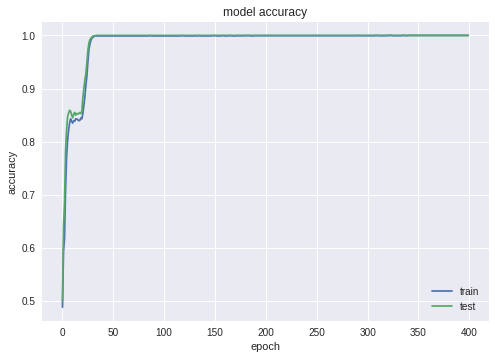

In [0]:
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

Maximum Loss : 0.6878

Minimum Loss : 0.0028

Loss difference : 0.6849


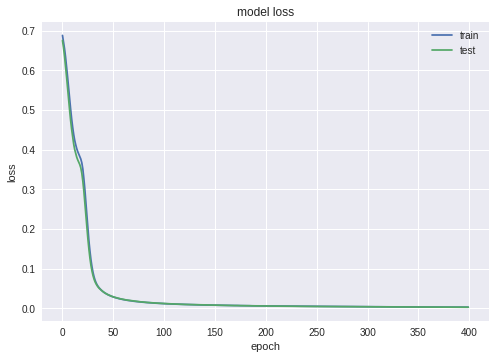

In [0]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# Visualization

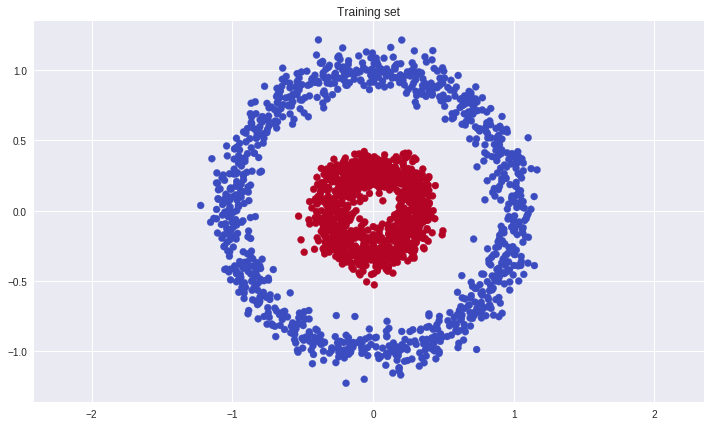

In [0]:
plt.figure(figsize=(12,7))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train[0,:] ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

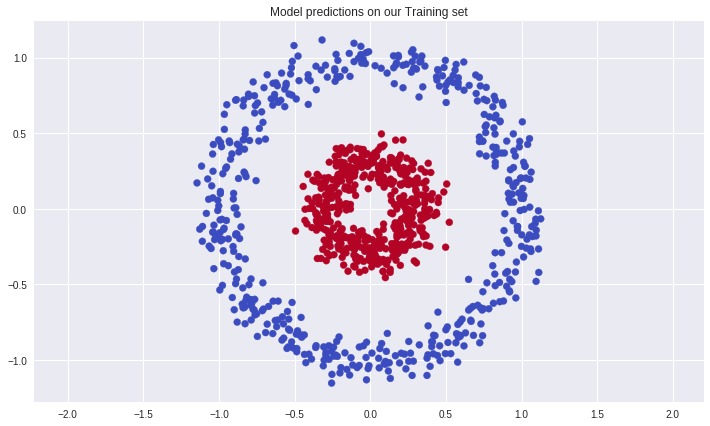

In [0]:
plt.figure(figsize =(12,7))
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Training set')
plt.axis('equal');

In [0]:
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)


# Output layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nOutput layer weights",weights1.shape,":\n",weights1)
print("Output layer biases",biases1.shape,":\n",biases1)

Input layer weights (2, 6) :
 [[ 1.9465358  -0.17538781  0.12280516  0.17325395 -5.1113024   4.322896  ]
 [-5.5063453  -0.10645939  0.12624834 -0.09363475  1.1054304   4.678166  ]]
Input layer biases (6,) :
 [-1.4364098  -0.23396432 -0.24781011 -0.27912357 -1.2378188  -1.3797681 ]

Output layer weights (6, 1) :
 [[-6.560309  ]
 [ 0.14959942]
 [ 0.15053725]
 [ 0.27007234]
 [-6.968896  ]
 [-5.1357193 ]]
Output layer biases (1,) :
 [10.414007]


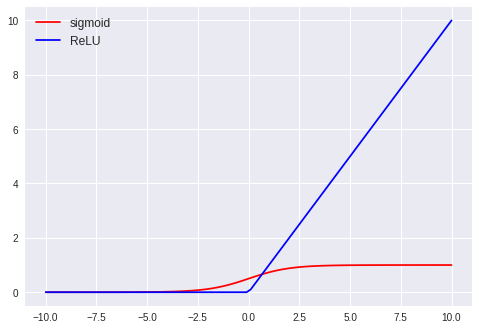

In [0]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def ReLU(z):
    return np.maximum(0,z)
  
z = np.linspace(-10,10,100)
plt.plot(z, sigmoid(z),'r', label = 'sigmoid')
plt.plot(z, ReLU(z),'b',label ='ReLU')
plt.legend(fontsize=12)

In [0]:
x1 = np.linspace(-2,2,50)
x2 = np.linspace(-2,2,50)
x3 = np.linspace(-1,1,50*50)

result = np.zeros((50*50,3)) 

out11 = np.zeros((50*50, 1))
out12 = np.zeros((50*50, 1))
out13 = np.zeros((50*50, 1))
out14 = np.zeros((50*50, 1))
out15 = np.zeros((50*50, 1))
out16 = np.zeros((50*50, 1))

out21 = np.zeros((50*50, 1))


for i in range(len(x1)):
  for j in range(len(x2 )):
    # Input layer
    n11 = x1[i] * weights0[0][0] + x2[j] * weights0[1][0] + biases0[0]
    a11 = ReLU(n11)

    n12 = x1[i] * weights0[0][1] + x2[j] * weights0[1][1] + biases0[1]
    a12 = ReLU(n12)
    
    n13 = x1[i] * weights0[0][2] + x2[j] * weights0[1][2] + biases0[2]
    a13 = ReLU(n13)
    
    n14 = x1[i] * weights0[0][3] + x2[j] * weights0[1][3] + biases0[3]
    a14 = ReLU(n14)
    
    n15 = x1[i] * weights0[0][4] + x2[j] * weights0[1][4] + biases0[4]
    a15 = ReLU(n15)
    
    n16 = x1[i] * weights0[0][5] + x2[j] * weights0[1][5] + biases0[5]
    a16 = ReLU(n16)
  
    # Output layer
    n21 = a11 * weights1[0][0] + a12 * weights1[1][0] + a13 * weights1[2][0] + a14 * weights1[3][0] + a15 * weights1[4][0] +a16 * weights1[5][0] + biases1[0]
    a21 = sigmoid(n21)

    
    result[i*50+j,0 ] = x1[i]
    result[i*50+j, 1] = x2[j]

    out11[i*50+j] = a11
    out12[i*50+j] = a12
    out13[i*50+j] = a13
    out14[i*50+j] = a14
    out15[i*50+j] = a15
    out16[i*50+j] = a16
    
    out21[i*50+j] = a21

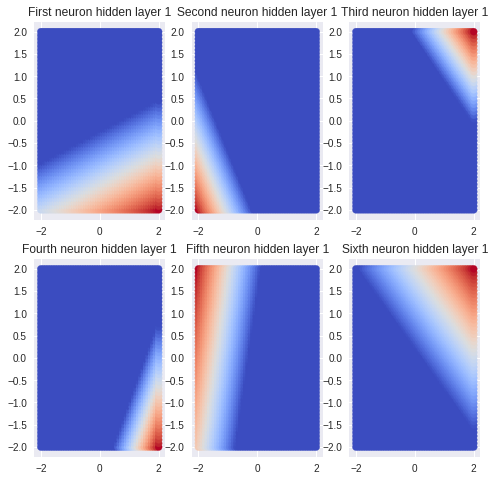

In [0]:
plt.figure(figsize =(8,8))

# First neuron, input layer
plt.subplot(231)
plt.title('First neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out11.reshape(-1), cmap=cm.coolwarm)

# Second neuron, input layer
plt.subplot(232)
plt.title('Second neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out12.reshape(-1), cmap=cm.coolwarm)

# Third neuron, input layer
plt.subplot(233)
plt.title('Third neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out13.reshape(-1), cmap=cm.coolwarm)

# Fourth neuron, input layer
plt.subplot(234)
plt.title('Fourth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out14.reshape(-1), cmap=cm.coolwarm)

# Fifth neuron, input layer
plt.subplot(235)
plt.title('Fifth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out15.reshape(-1), cmap=cm.coolwarm)

# Sixth neuron, input layer
plt.subplot(236)
plt.title('Sixth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out16.reshape(-1), cmap=cm.coolwarm)

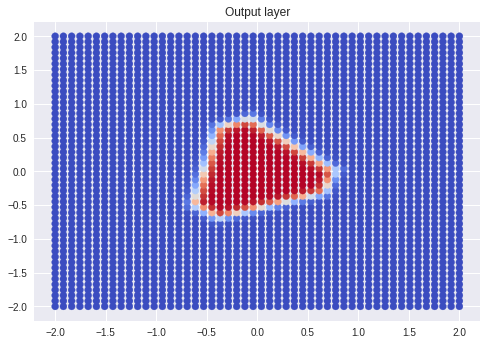

In [0]:
# output layer
plt.title('Output layer')
plt.scatter(result[:, 0], result[:, 1], c= out21.reshape(-1), cmap=cm.coolwarm)

Text(0.5,0.92,'3D visualization of our neural network first layer sixth neuron')

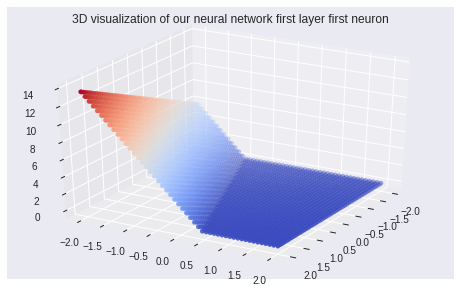

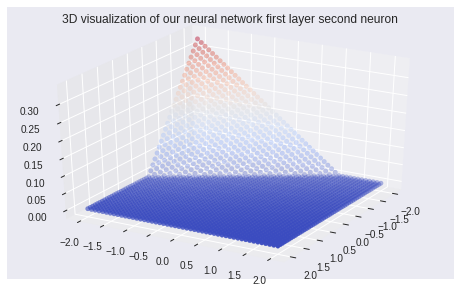

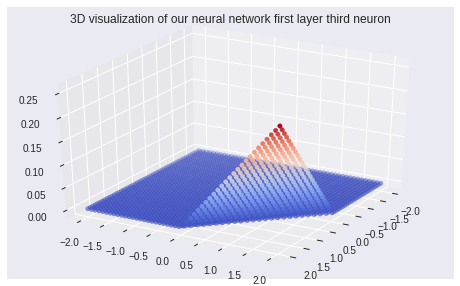

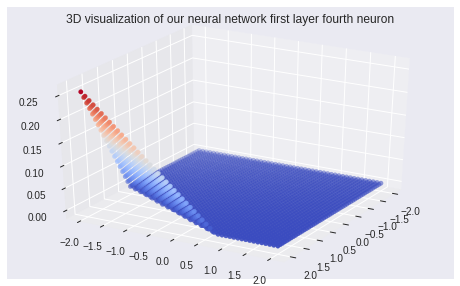

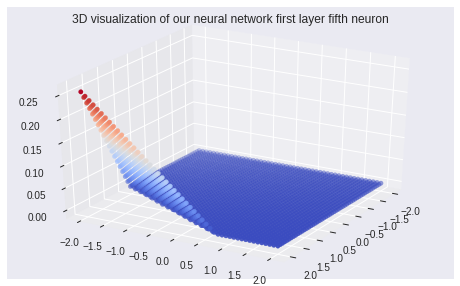

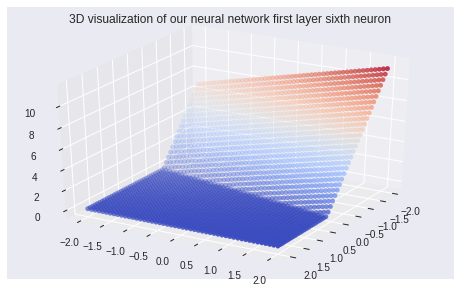

In [0]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out11.reshape(-1), c=out11.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer first neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out12.reshape(-1), c=out12.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer second neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out13.reshape(-1), c=out13.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer third neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out14.reshape(-1), c=out14.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer fourth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out14.reshape(-1), c=out14.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer fifth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out15.reshape(-1), c=out15.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer sixth neuron')

Text(0.5,0.92,'3D visualization of our neural network output layer')

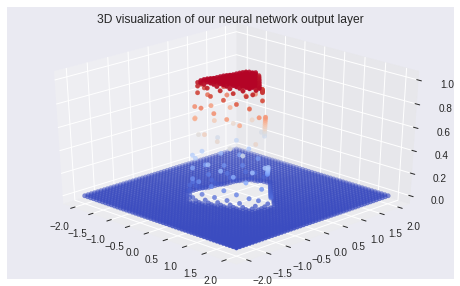

In [0]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out21.reshape(-1), c=out21.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30,-45)
ax.set_title('3D visualization of our neural network output layer')